<a href="https://colab.research.google.com/github/miaomiaoYao/HW/blob/main/CNeuro/CNeuro_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Nonhomogeneous Poisson Processes

In [2]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [3]:
# parameters
r0 = 100
tau = 0.3
T = 20

$$r(t) = r_0 (1 + cos(\frac{2\pi t}{\tau}))$$

$$\Lambda(t) = \int_{t=0}^T r(t) dt = r_0(T + \frac{\tau}{2 \pi}sin(\frac{2\pi T}{\tau}))$$

In [4]:
def r(t):
  return r0*(1+np.cos(2*np.pi*t/tau))

def lambda_t(T):
  start = 0
  stop = T
  length = 1000
  t = np.linspace(start, stop, length)
  result = (stop-start)/length * sum(r(t))
  return result

def Lambda_t(T):
  return r0*(T + tau/2*np.pi*np.sin(2*np.pi*T/tau))

## Inversion Methods

**Cinlar's Method**

> The random variables $T_1, T_2,\dots$ are event times corresponding to a Nonhomogeneous Poisson Process with expectation function $\Lambda(t)$ if and only if $\Lambda(T_1), \Lambda(T_2), \dots$ are the event times corresponding to a homogeneous Poisson Process with rate 1

Initialize: $s = 0$ 

$\rightarrow$ generate $x_1 \sim Exp(1), s = s + x_1 \quad (1)$ 

$\rightarrow t_1  = \Lambda^{-1}(s) \quad (2)$

repeat (1) and (2) and we get $t_1,\dots,t_n$

> the obstacle here is how to calculate the inverse function of $\Lambda_t$

**Another Inversion Approach**

$F_{t_i}(x) = 1 - e^{-\Lambda(t_i + x) + \Lambda(t_i)}$

$t = 0$
$\rightarrow x \sim F_{t}, t = t + x$
repeat above step and get direct simulation of $t$

> the obstacle here is using MC to generate $x \sim F_t(x)$




## Order statistics 

Assuming that there are n spikes during fixed time interval $[0, t_0]$

Generate $n \sim Poisson(\Lambda(t_0))$
Independently generate $t_1,\dots,t_n$ from cdf $F(t) = \frac{\Lambda(t)}{\Lambda(t_0)}$
Then the order statistics $t_{(1)}, \dots, t_{(n)}$ is what we want.

> the obstacle here is that we do not know how many spikes happen in advance



## Acceptance-Rejection

choose $0 \leq \lambda(t) \leq \lambda_u(t), t \in [0,T_0]$, then we accept the real spike points with probability $\frac{\lambda(t)}{\lambda_u}$

Initialize: $t = 0$

$\rightarrow u_1 \sim U(0,1)$

$\rightarrow t = t - \frac{1}{\lambda_u}log(u_1)$

$u_2 \sim U(0,1), u_2 \perp u_1$

if  $u_2 \leq \frac{\lambda(t)}{\lambda_u}$, accept $t_1 = t$, repeat

In this problem, we have $r(t) = r_0(1 + cos(\frac{2\pi t}{\tau})) \leq 2r_0$, then we choose the bounded homogeneous poisson process of rate $2r_0$

In [13]:
def accept_reject(T):
  t = 0
  S = 0
  S_t = []
  while t <= T:
    u1 = np.random.uniform(0,1)
    t = t - np.log(u1)
    if t > T:
      break
    u2 = np.random.uniform(0,1)
    if u2 < r(t)/(2*r0):
      S = S+1
      S_t.append(t)

  return S_t
      


Text(0, 0.5, 'spike count')

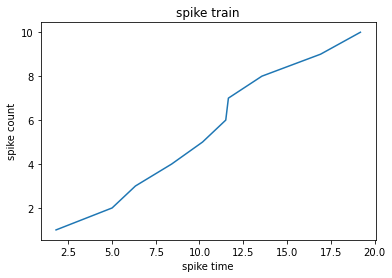

In [33]:
# simulate spike time
S_t = accept_reject(T)
plt.plot(S_t, range(1,len(S_t)+1))
plt.title("spike train")
plt.xlabel("spike time")
plt.ylabel("spike count")

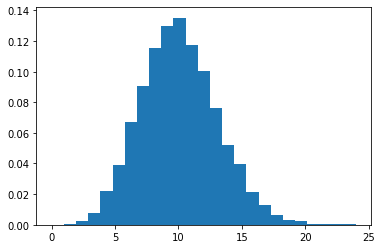

In [28]:
spike_num = []
for i in range(10000):
  # MC method 
  spike_num.append(len(accept_reject(T)))

_, ax = plt.subplots()
n, bins, patches = ax.hist(spike_num, bins = 25, density = True)

ref: [Generating Nonhomogeneous Poisson Processes](https://web.ics.purdue.edu/~pasupath/PAPERS/2011pasB.pdf)